In [13]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


mnist = keras.datasets.mnist

# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28 * 28)  
x_test = x_test.reshape(-1, 28 * 28)

In [14]:
print(x_train.shape) # 28 x 28 = 784
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


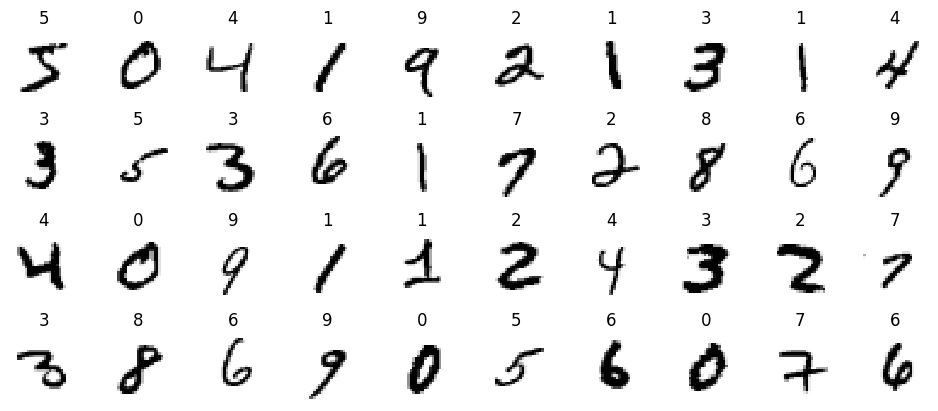

In [6]:
import matplotlib.pyplot as plt


n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Normal Random Forest

In [11]:
# flatten x_train
num_samples_train = x_train.shape[0]  # Number of training dataset
x_train_flattened = x_train.reshape(num_samples_train, -1)  # 28x28 image -> 1d

# 훈련 데이터의 모양 확인
print("Before x_train.shape:", x_train.shape)
print("After x_train_flattened.shape:", x_train_flattened.shape)

Before x_train.shape: (60000, 28, 28)
After x_train_flattened.shape: (60000, 784)


In [13]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, random_state=42)
clf.fit(x_train_flattened, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [14]:
x_test_flattened = x_test.reshape(x_test.shape[0], -1)
clf.score(x_test_flattened, y_test)

0.9485

### Randomforest with PCA

I think we don't need white space in image to predict the labels.   
Let's reduce those dimensions(in this case each pixels) using PCA so that model's accuracy could be improved

In [15]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# PCA 모델 초기화
pca = PCA(0.9)  # 주성분 개수를 50개로 설정 (예시용)

# PCA 학습 및 변환
X_pca = pca.fit_transform(x_train)

# 주성분의 설명된 분산 비율 확인
explained_var_ratio = pca.explained_variance_ratio_


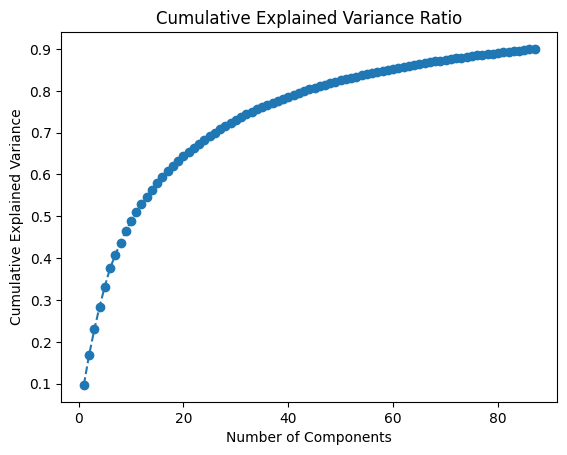

In [19]:
# 주성분들의 설명된 분산 비율 확인 (설명된 분산 비율이 높은 순서대로)

plt.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Ratio')
plt.show()

In [20]:
print(f"{len(X_pca[0])} pixels left after PCA")

# We can explain mnist dataset with only 87 pixels!!

87 pixels left after PCA


In [34]:
# 주성분들이 어떤 원본 변수들의 조합으로 이루어졌는지 확인
cnt=0
for i in range(1):  # 처음 5개 주성분만 확인 (예시용)
    print(f"Principal Component {i+1}:")
    for j, (weight, pixel) in enumerate(zip(pca.components_[i], range(28*28))):
        if weight > 0.065:
            # print(f"Pixel {pixel}: {weight:.4f}")
            cnt+=1
    print("\n")

print("주성분 개수 =", cnt)

Principal Component 1:


주성분 개수 = 88


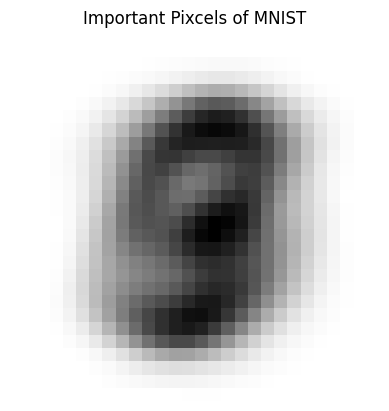

In [43]:
plt.imshow(pca.mean_.reshape(28, 28), cmap="binary", interpolation="nearest")
plt.axis('off')
plt.title("Important Pixcels of MNIST", fontsize=12)
plt.show()